<a href="https://colab.research.google.com/github/S-Shivaprasad/Cybersecurity-Threat-Classification-Using-Machine-Learning/blob/main/ML_Engineer_Assignmant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Cybersecurity Threat Classification Using Machine Learning
This notebook aims to detect **cybersecurity threats** using machine learning techniques. We will preprocess network traffic data, extract features, train models, and evaluate performance.

## 1️⃣ Introduction
Cybersecurity threats such as **DDoS attacks, port scanning, and web attacks** can be detected using ML models. The dataset used for this project is CICIDS2017, which contains real-world intrusion detection data.

## 2️⃣ Data Preprocessing
**Steps included:**
- Load the dataset from CSV files
- Merge multiple datasets into a single DataFrame
- Handle missing values using median imputation
- Remove unwanted columns such as IP addresses and timestamps
- Normalize numerical features for better model performance

In [1]:
import numpy as np
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1=pd.read_csv("/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/drive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/drive/MyDrive/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/drive/MyDrive/Monday-WorkingHours.pcap_ISCX.csv")

In [4]:
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233163 entries, 0 to 1233162
Data columns (total 79 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1233163 non-null  int64  
 1    Flow Duration                1233163 non-null  int64  
 2    Total Fwd Packets            1233163 non-null  int64  
 3    Total Backward Packets       1233163 non-null  int64  
 4   Total Length of Fwd Packets   1233163 non-null  int64  
 5    Total Length of Bwd Packets  1233163 non-null  int64  
 6    Fwd Packet Length Max        1233163 non-null  int64  
 7    Fwd Packet Length Min        1233163 non-null  int64  
 8    Fwd Packet Length Mean       1233163 non-null  float64
 9    Fwd Packet Length Std        1233163 non-null  float64
 10  Bwd Packet Length Max         1233163 non-null  int64  
 11   Bwd Packet Length Min        1233163 non-null  int64  
 12   Bwd Packet Length Mean     

In [6]:
merged_df.columns = merged_df.columns.str.replace(" ", "_")

In [7]:
merged_df.columns

Index(['_Destination_Port', '_Flow_Duration', '_Total_Fwd_Packets',
       '_Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       '_Total_Length_of_Bwd_Packets', '_Fwd_Packet_Length_Max',
       '_Fwd_Packet_Length_Min', '_Fwd_Packet_Length_Mean',
       '_Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       '_Bwd_Packet_Length_Min', '_Bwd_Packet_Length_Mean',
       '_Bwd_Packet_Length_Std', 'Flow_Bytes/s', '_Flow_Packets/s',
       '_Flow_IAT_Mean', '_Flow_IAT_Std', '_Flow_IAT_Max', '_Flow_IAT_Min',
       'Fwd_IAT_Total', '_Fwd_IAT_Mean', '_Fwd_IAT_Std', '_Fwd_IAT_Max',
       '_Fwd_IAT_Min', 'Bwd_IAT_Total', '_Bwd_IAT_Mean', '_Bwd_IAT_Std',
       '_Bwd_IAT_Max', '_Bwd_IAT_Min', 'Fwd_PSH_Flags', '_Bwd_PSH_Flags',
       '_Fwd_URG_Flags', '_Bwd_URG_Flags', '_Fwd_Header_Length',
       '_Bwd_Header_Length', 'Fwd_Packets/s', '_Bwd_Packets/s',
       '_Min_Packet_Length', '_Max_Packet_Length', '_Packet_Length_Mean',
       '_Packet_Length_Std', '_Packet_Length_Variance', '

In [8]:
null_values = merged_df.isnull().sum()
infinite_values = merged_df.isin([np.inf, -np.inf]).sum()

missing_data_report = pd.DataFrame({
    "Null Values": null_values,
    "Infinite Values": infinite_values
})

print(missing_data_report[(missing_data_report["Null Values"] > 0) | (missing_data_report["Infinite Values"] > 0)])


                 Null Values  Infinite Values
Flow_Bytes/s             111              853
_Flow_Packets/s            0              964


In [9]:
merged_df["Flow_Bytes/s"] = merged_df["Flow_Bytes/s"].fillna(merged_df["Flow_Bytes/s"].median())
merged_df["Flow_Bytes/s"] = merged_df["Flow_Bytes/s"].replace([float("inf"), -float("inf")], merged_df["Flow_Bytes/s"].median())

In [10]:
merged_df["_Flow_Packets/s"] = merged_df["_Flow_Packets/s"].replace([float("inf"), -float("inf")], merged_df["_Flow_Packets/s"].median())

In [11]:
null_values = merged_df.isnull().sum()
infinite_values = merged_df.isin([np.inf, -np.inf]).sum()

missing_data_report = pd.DataFrame({
    "Null Values": null_values,
    "Infinite Values": infinite_values
})

print(missing_data_report[(missing_data_report["Null Values"] > 0) | (missing_data_report["Infinite Values"] > 0)])


Empty DataFrame
Columns: [Null Values, Infinite Values]
Index: []


In [12]:
columns_to_drop = ["Flow_ID", "Source_IP", "Destination_IP", "_Timestamp", "Src_Port", "Dst_Port"]  # Modify as needed
merged_df = merged_df.drop(columns=columns_to_drop, errors="ignore")

## 3️⃣ Feature Selection
**Steps included:**
- Compute correlation matrix to remove highly correlated features
- Retain only relevant features to reduce dimensionality and improve accuracy

In [13]:
# Drop columns with only one unique value
merged_df = merged_df.loc[:, merged_df.nunique() > 1]


In [14]:
# Select only numeric columns
numeric_df = merged_df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Find upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find highly correlated features
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# Drop them from merged_df
merged_df = merged_df.drop(columns=to_drop)


In [15]:
print(merged_df.select_dtypes(include=["object"]).columns)

Index(['_Label'], dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df["_Label"] = label_encoder.fit_transform(merged_df["_Label"])

In [17]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = merged_df.drop(columns=["_Label"])  # Features
y = merged_df["_Label"]  # Target variable (attack category)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (986530, 35), Testing set: (246633, 35)


## 4️⃣ Model Selection & Training
**ML Models Used:**
- **Random Forest** – A tree-based ensemble method for classification
- **Neural Network (Optional)** – A deep learning model for complex patterns

Each model is trained on the dataset after splitting it into **80% training** and **20% testing**.

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [19]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
nn_preds = nn_model.predict(X_test)


## 5️⃣ Model Evaluation
**Performance Metrics Used:**
- **Accuracy** – Overall correctness of the model
- **Precision** – How many predicted threats were actually threats
- **Recall** – How well the model detects all threats
- **F1-score** – Balance between precision and recall

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to print evaluation metrics
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n🔹 {model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Evaluate each model
evaluate_model("Random Forest", y_test, rf_preds)

evaluate_model("Neural Network", y_test, nn_preds)



🔹 Random Forest Performance:
Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9994
F1-score: 0.9994

🔹 Neural Network Performance:
Accuracy: 0.7719
Precision: 0.6938
Recall: 0.7719
F1-score: 0.6782


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6️⃣ Visualization
**Insights presented using graphs:**
- **Confusion Matrix** – Shows misclassifications between different threat categories
- **Feature Importance** – Displays which network traffic features contribute most to classification

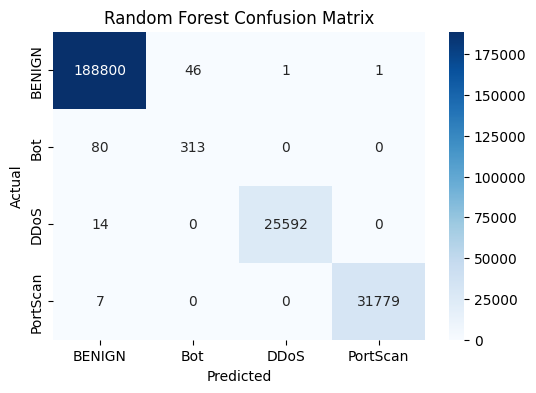

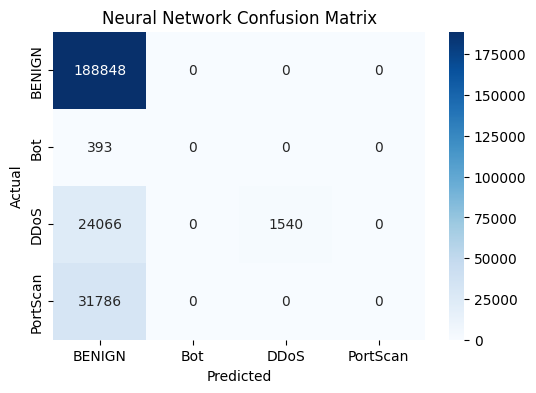

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix for a model
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
#plot_confusion_matrix(y_test, svm_preds, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, nn_preds, "Neural Network Confusion Matrix")


## 7️⃣ Conclusion
**Key takeaways:**
- The best model for threat classification will be determined based on evaluation metrics
- Further improvements may include hyperparameter tuning or using deep learning methods